In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Engineering_graduate_salary.csv')
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [ ]:
# 1. What inferences may be drawn regarding the interaction between the salary of engineering graduates and their age as of now?

from datetime import date
today = date.today()
print("Today's date:", today)

Today's date: 2023-07-03


In [ ]:
df['DOB'] = pd.to_datetime(df['DOB'], infer_datetime_format=True)
df['DOB'].head()

0   1990-10-22
1   1990-05-15
2   1989-08-21
3   1991-05-04
4   1990-10-30
Name: DOB, dtype: datetime64[ns]

In [ ]:
# Function to calculate age
def age(dob):
    today = date.today()
    return today.year - dob.year - ((today.month,
                                      today.day) < (dob.month,
                                                    dob.day))
# we subtract current year from the born year, and then if the current date and month have not passed born date and month,
# we subtract one as his/her birth date and month is yet to come

df['Age'] = df['DOB'].apply(age)

In [ ]:
df['Age'].head()

0    32
1    33
2    33
3    32
4    32
Name: Age, dtype: int64

In [ ]:
df['Age'].min()

26

In [ ]:
df['Age'].max()

42

In [ ]:
labels = ['26-30', '31-35', '36-40', '41-45']
df['Age group'] = pd.cut(df['Age'], bins=4, labels=labels)
df['Age group'].head()

0    31-35
1    31-35
2    31-35
3    31-35
4    31-35
Name: Age group, dtype: category
Categories (4, object): ['26-30' < '31-35' < '36-40' < '41-45']

In [ ]:
df['Age group'].value_counts()

31-35    2177
26-30     543
36-40     270
41-45       8
Name: Age group, dtype: int64

In [ ]:
age_salary = df.groupby('Age group')['Salary'].mean()
age_salary

Age group
26-30    271406.998158
31-35    304269.637115
36-40    380648.148148
41-45    296250.000000
Name: Salary, dtype: float64

The average salary appears to be highest for graduates falling in the 36-40 age group

In [ ]:
df['Salary'].min()

35000

In [ ]:
df['Salary'].max()

4000000

In [ ]:
df[df['Salary']==4000000]

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Age group
2295,48107,m,1987-09-09,90.83,rbse,2005,88.77,rbse,2857,1,...,-1,-1,-0.7264,0.0328,-1.6502,-0.8778,-0.1295,4000000,35,36-40
2964,41147,m,1987-09-13,53.00,up bord,2004,61.00,up bord,64,2,...,-1,-1,-3.3539,-0.4353,-1.0697,-0.0552,-2.6572,4000000,35,36-40


<Axes: xlabel='collegeGPA', ylabel='Salary'>

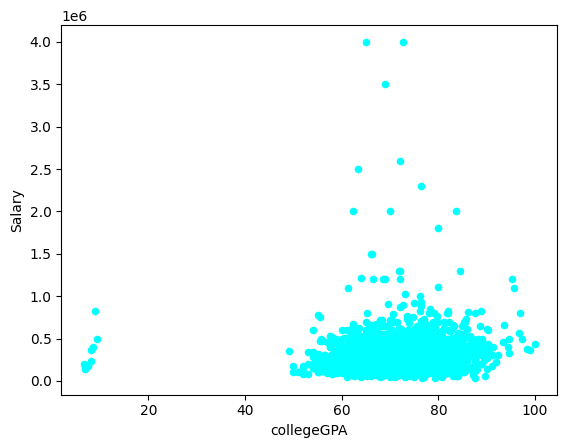

In [ ]:
# 2. Check for any relation between GPA and salary, note down observations (if any).

df.plot(x='collegeGPA', y='Salary', kind='scatter', color='cyan')

No discernible correlation between the two variables in consideration

In [ ]:
df['CollegeTier'].value_counts()

2    2772
1     226
Name: CollegeTier, dtype: int64

In [ ]:
# 3. Identify whether outliers are present in GPA and treat them using appropriate means (if present).

# Calculate the IQR
Q1 = df['collegeGPA'].quantile(0.25)
Q3 = df['collegeGPA'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['collegeGPA'] < lower_bound) | (df['collegeGPA'] > upper_bound)]
outliers

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Age group
5,609356,f,1989-12-02,83.16,icse,2007,77.00,cbse,10950,1,...,313,-1,0.8463,-0.6201,-0.7585,-0.99500,-0.2859,440000,33,31-35
213,818479,m,1992-09-29,85.80,cbse,2010,83.00,cbse,11898,1,...,-1,-1,-0.1590,0.5454,0.4711,-1.12180,-0.6692,300000,30,26-30
241,327206,m,1988-04-07,61.60,maharashtra state board,2006,57.83,maharashtra state board,6196,2,...,-1,-1,-1.2287,-0.2793,-0.4891,-0.08457,-0.1295,350000,35,36-40
299,385442,m,1990-10-28,81.20,cbse,2007,87.60,hbse,120,1,...,-1,-1,-0.8810,-0.0842,-0.4891,-0.05520,-0.2875,820000,32,31-35
441,220634,m,1988-12-14,87.60,0,2006,81.40,0,285,1,...,-1,-1,-1.6538,-0.5913,0.2366,-0.17270,0.5024,500000,34,31-35
631,619658,m,1991-11-04,74.00,cbse,2008,79.80,cbse,275,2,...,-1,-1,-0.3027,0.0459,-1.6807,0.01920,-0.6692,460000,31,31-35
723,41579,f,1988-09-23,81.20,ssc,2006,76.30,hsc,388,2,...,-1,-1,-0.1082,0.5008,-0.1626,1.11990,-0.9194,370000,34,31-35
757,1262900,m,1993-06-14,58.90,state board,2010,68.00,state board,1808,2,...,-1,-1,1.8517,0.2124,0.6248,-1.75560,-0.4776,180000,30,26-30
770,345838,m,1991-05-29,89.00,0,2008,96.70,0,6659,2,...,393,-1,-0.6491,-0.4353,0.6720,1.85433,-0.1295,225000,32,31-35
797,337629,f,1990-09-10,93.50,0,2008,95.30,0,3076,2,...,-1,-1,-0.5719,1.0858,-0.9245,0.06223,0.1864,300000,32,31-35


In [ ]:
# Remove outliers
df_no_outl = df[(df['collegeGPA'] >= lower_bound) & (df['collegeGPA'] <= upper_bound)]
df_no_outl.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary,Age,Age group
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000,32,31-35
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000,33,31-35
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000,33,31-35
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000,32,31-35
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000,32,31-35


In [ ]:
df_no_outl.shape

(2966, 36)

<Axes: ylabel='Frequency'>

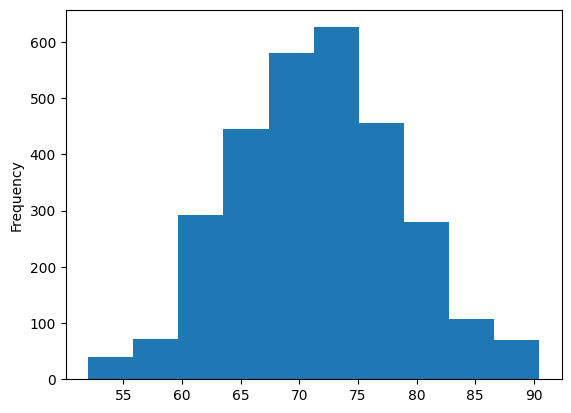

In [ ]:
df_no_outl['collegeGPA'].plot(kind='hist')

In [ ]:
# Replace outliers with the median value
median = df['collegeGPA'].median()
df['collegeGPA'] = df['collegeGPA'].mask((df['collegeGPA'] < lower_bound) | (df['collegeGPA'] > upper_bound), median)
df.shape

(2998, 36)

<Axes: ylabel='Frequency'>

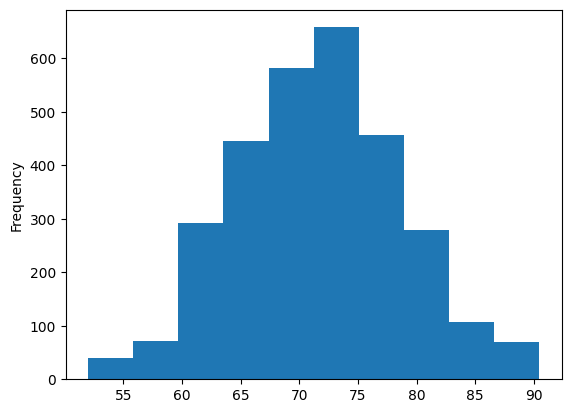

In [ ]:
df['collegeGPA'].plot(kind='hist')

In [ ]:
# 4. What is your take on gender versus the percentage scored in higher secondary examinations? Analyze the gender ratio when the scores are higher than 85%.

gender_score = df.groupby('Gender')['12percentage'].mean()
gender_score

Gender
f    77.118855
m    73.469500
Name: 12percentage, dtype: float64

On an average, female graudates have scored higher by ~4% over males

<Axes: xlabel='Gender'>

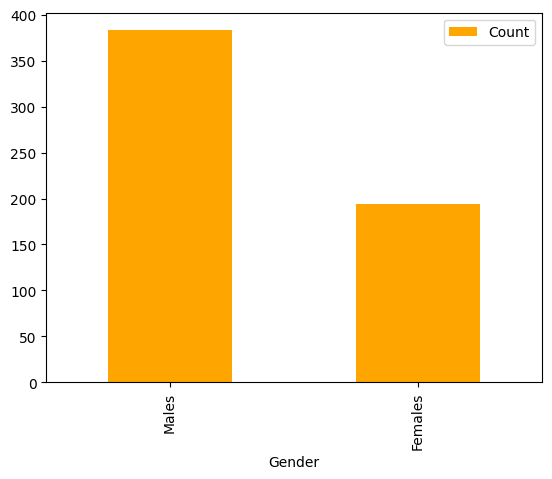

In [ ]:
males_above_85 = df[(df['Gender'] == 'm') & (df['12percentage'] > 85)]
females_above_85 = df[(df['Gender'] == 'f') & (df['12percentage'] > 85)]

males_count = len(males_above_85)
females_count = len(females_above_85)

# Create a new DataFrame for plotting
plot_data = pd.DataFrame({'Gender': ['Males', 'Females'], 'Count': [males_count, females_count]})

# Plot the data
plot_data.plot(kind='bar', x='Gender', y='Count', color='orange')

When considering the gender ratio for scores > 85%, male graduates overtake their female counterparts

In [ ]:
df.columns

Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary', 'Age', 'Age group'],
      dtype='object')

In [ ]:
# 5. Explore whether any relation exists between the tier of the college and the salary earned by the graduates with respect to their identified gender.

tier_gender_salary = pd.pivot_table(data=df, index=['CollegeTier'], columns=['Gender'], values=['Salary'], aggfunc='mean')
tier_gender_salary

Salary               
Gender                   f              m
CollegeTier                              
1            364880.952381  454076.086957
2            285778.931751  297151.572927

<Axes: ylabel='CollegeTier'>

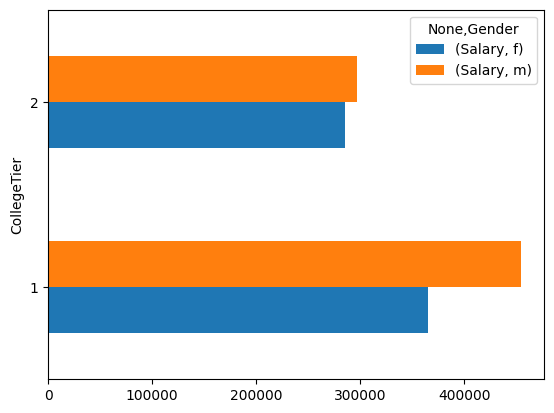

In [ ]:
tier_gender_salary.plot(kind='barh')

- Overall, Tier 1 college graduates earn more than those belonging to Tier 2.
- Within Tier 1, males earn more than females on an average.